### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

In [4]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 67kB/s 
     |████████████████████████████████| 450kB 37.0MB/s 
     |████████████████████████████████| 3.8MB 41.1MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


### Load tensorflow

In [0]:
import tensorflow as tf
tf.random.set_seed(42)

In [75]:
tf.__version__

'2.0.0'

### Collect Data

In [2]:
import keras

Using TensorFlow backend.


In [3]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [78]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
y_train = tf.keras.utils.to_categorical(trainY, 10)
y_test = tf.keras.utils.to_categorical(testY, 10)

In [5]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])
y_train.shape

(60000,)
First 5 examples now are:  [9 0 0 3 0]


(60000, 10)

In [81]:
trainY[9]

5

In [82]:
trainY.shape

(60000,)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

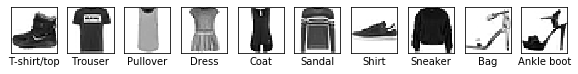

In [7]:

import matplotlib.pyplot as plt
#plt.imshow(trainX[0].reshape((28, 28)), cmap = 'gray')
plt.figure(figsize=(10,10))
for i in range (10):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten



model = Sequential()
model.add(Flatten( input_shape=(28,28)))

model.add(Dense(10))


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='sgd',metrics=['accuracy'])

In [0]:
#x_train=trainX.reshape(trainX.shape[0],784).astype('float32')
#x_test=testX.reshape(testX.shape[0],784).astype('float32')
#trainXX = x_train / 255.0

#testXX = x_test / 255.0

trainXX = trainX / 255.0
testXX = testX / 255.0

In [122]:
trainXX.shape
testXX.shape

(10000, 28, 28)

### Execute the model using model.fit()

In [11]:
epochs = 10
history = model.fit(trainXX, trainY, epochs=epochs)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.8258 - accuracy: 0.7376
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5903 - accuracy: 0.8083
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5409 - accuracy: 0.8231
Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5144 - accuracy: 0.8297
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4973 - accuracy: 0.8353
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4847 - accuracy: 0.8386
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4751 - accuracy: 0.8410
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4673 - accuracy: 0.8432
Epoch 9/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4610 - accuracy: 0.8449
Epoch 10/10
60

In the above Neural Network model add Batch Normalization layer after the input layer av
nd repeat the steps.

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
import numpy as np
import keras
import tensorflow as tf

(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

#trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
#testX = testX.reshape((testX.shape[0], 28, 28, 1))

print(trainX.shape)
print(testX.shape)

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

#trainY = tf.keras.utils.to_categorical(trainY, 10)
#testY = tf.keras.utils.to_categorical(testY, 10)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)


model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10))


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='sgd',metrics=['accuracy'])

epochs = 10
batch_size = 512

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)



Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 35us/sample - loss: 1.7580 - accuracy: 0.4944 - val_loss: 1.2803 - val_accuracy: 0.6498
Epoch 2/10
54000/54000 [==============================] - 1s 23us/sample - loss: 1.0985 - accuracy: 0.6685 - val_loss: 0.9521 - val_accuracy: 0.6933
Epoch 3/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.8967 - accuracy: 0.7046 - val_loss: 0.8271 - val_accuracy: 0.7202
Epoch 4/10
54000/54000 [==============================] - 1s 23us/sample - loss: 0.8004 - accuracy: 0.7316 - val_loss: 0.7529 - val_accuracy: 0.7425
Epoch 5/10
54000/54000 [==============================] - 1s 23us/sample - loss: 0.7388 - accuracy: 0.7543 - val_loss: 0.7020 - val_accuracy: 0.7655
Epoch 6/10
54000/54000 [==============================] - 1s 23us/sample - loss: 0.6943 - accuracy: 0.7704 - val_loss: 0.6671 - val_accuracy: 0.7715
Epoch 7/10
54000/54000 [=

### Execute the model

In [4]:
preds = model.predict(testX)
preds[0]

array([-2.9271224, -4.2158146, -2.0315537, -2.5609756, -1.3988872,
        4.851204 , -2.5675735,  5.067371 ,  2.433167 ,  5.485907 ],
      dtype=float32)

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [4]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()


trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
model = Sequential()
#Reshape data from 2D to 1D -> 28x28 to 784

#Normalize the data
model.add(Flatten())
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd_optimizer = SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 1.1712 - accuracy: 0.6621 - val_loss: 0.8705 - val_accuracy: 0.7342
Epoch 2/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.7608 - accuracy: 0.7714 - val_loss: 0.7113 - val_accuracy: 0.7735
Epoch 3/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6542 - accuracy: 0.7932 - val_loss: 0.6425 - val_accuracy: 0.7933
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.5962 - accuracy: 0.8068 - val_loss: 0.6035 - val_accuracy: 0.7979
Epoch 5/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.5631 - accuracy: 0.8149 - val_loss: 0.5762 - val_accuracy: 0.8073
Epoch 6/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.5347 - accuracy: 0.8208 - val_loss: 0.5575 - val_accuracy: 0.8054
Epoch 7/10
60000/60000 [===========================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()


trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
model = Sequential()
#Reshape data from 2D to 1D -> 28x28 to 784

#Normalize the data
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd_optimizer = SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.9002 - accuracy: 0.6780 - val_loss: 0.7361 - val_accuracy: 0.7052
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.7032 - accuracy: 0.7305 - val_loss: 0.6916 - val_accuracy: 0.7351
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.6755 - accuracy: 0.7427 - val_loss: 0.6595 - val_accuracy: 0.7574
Epoch 4/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.7182 - accuracy: 0.7359 - val_loss: 0.9608 - val_accuracy: 0.7120
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.7525 - accuracy: 0.7320 - val_loss: 0.6978 - val_accuracy: 0.7347
Epoch 6/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.6869 - accuracy: 0.7434 - val_loss: 0.7804 - val_accuracy: 0.7214
Epoch 7/10
60000/60000 [===========================

## Review model

In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  78500     
_________________________________________________________________
dense_9 (Dense)              multiple                  10100     
_________________________________________________________________
dense_10 (Dense)             multiple                  1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### Run the model

In [9]:
y_predict = model.predict(testX)
y_predict[0]

array([3.0970774e-04, 1.5982645e-05, 3.6749432e-03, 7.6911339e-05,
       7.5287523e-04, 1.6393515e-01, 3.5165213e-03, 5.5420663e-02,
       5.5507054e-03, 7.6674652e-01], dtype=float32)